# Recap

Let's build a entire CNN to classify images

# Part 1. MNIST Classification

## The data

❓ Let's first load the MNIST dataset that includes images of handwritten figures

In [0]:
from tensorflow.keras import datasets

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

❓ Start by normalizing the data (you can divide by the maximum an image pixel can have) to help the neural network to converge

In [0]:
X_train = X_train/255.
X_test = X_test/255.

❓ Plot one of the image with the imshow function of matplotib (use cmap='Greys')

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(X_train[0], cmap='Greys')

❓ What is the size of your input images?

In [0]:
print(X_train[0].shape)

❓ In Keras, the last dimension of your input images has to correspond to the number of channels (aka colors), which in this case is 1 (grey images). Therefore, you have to add an additional dimension to your inputs (`X_train` and `X_test`) with the `tensorflow.keras.backend.expand_dims` function

In [0]:
from tensorflow.keras.backend import expand_dims

X_train = expand_dims(X_train, -1)
X_test = expand_dims(X_test, -1)

❓ How many categories are you trying to predict?

In [0]:
import numpy as np

np.unique(y_train)

❓ Convert your train and test prediction to one-hot encoded categories - you can do that thanks to the `tensorflow.keras.utils.to_categorical` function

In [0]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

## The model

Let's now build our Convolutional Neural Network

❓ Initialize a neural network with a first convolutional layer that has 4 filters, whose kernel sizes are (2, 2).   Do not forget to tell the first layer with `input_shape` the images have.

In [0]:
from tensorflow.keras import Sequential, layers

model = Sequential()
model.add(layers.Conv2D(4, kernel_size=(2, 2), activation='relu', input_shape=X_train[0].shape))

❓ After a convolution, there is usually a maxpooling layers whose role is to decrease the output resolution. Add  a MaxPool2D layer with a `pool_size` of (2, 2)

In [0]:
model.add(layers.MaxPool2D((2, 2)))

❓ Now, flatten your outputs with the `Flatten` layer

In [0]:
model.add(layers.Flatten())

❓ Add a fully connected layer with 5 neurons

In [0]:
model.add(layers.Dense(10, activation='relu'))

❓ Finally, add the output layer related to your task

In [0]:
model.add(layers.Dense(10, activation='softmax'))

❓ Rewrite all the previous cells in a single `init_model` function that also compiles the model with appropriate arguments.

In [0]:
def init_model():
    
    model = Sequential()
    
    model.add(layers.Conv2D(4, kernel_size=(2, 2), activation='relu', input_shape=X_train[0].shape))
    model.add(layers.MaxPool2D(2))
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam', 
                  metrics=['accuracy'])
    
    return model

❓ You can now initialize your model and fit it on the training set - do not forget the early stopping criterion.

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=2)

model = init_model()

history = model.fit(X_train, y_train_cat, 
                    validation_split=0.3, 
                    epochs=1000, 
                    batch_size=16,
                    callbacks=[es])

❓ Evaluate your model on the test set and print the accuracy

In [0]:
res = model.evaluate(X_test, y_test_cat, verbose=0)
res

❓ You can improve your model by
- having larger kernels (as (2,2) is relatively small as a first kernel for (28, 28) images)
- having more kernels
- having more neurons in the Dense layer
- having two convolutions (and the related Maxpool layer)

Write your model in a new `init_model_2` function.

In [0]:
def init_model_2():
    
    model = Sequential()
    
    model.add(layers.Conv2D(10, kernel_size=(3, 3), activation='relu', input_shape=X_train[0].shape))
    model.add(layers.MaxPool2D(2))
    
        
    model.add(layers.Conv2D(20, kernel_size=(3, 3), activation='relu'))
    model.add(layers.MaxPool2D(2))
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam', 
                  metrics=['accuracy'])
    
    return model

❓ Fit your new architecture

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=2)

model = init_model_2()

history = model.fit(X_train, y_train_cat, 
                    validation_split=0.3, 
                    epochs=1000, 
                    batch_size=16,
                    callbacks=[es])

❓Check that you improve your results with the new architecture.

In [0]:
res = model.evaluate(X_test, y_test_cat, verbose=0)
res

# Part 2. Inutitions about CNN

- [CNN explaniner](https://poloclub.github.io/cnn-explainer/)
- [Playground](https://tensorspace.org/html/playground/index.html)
- Reshape layers
- Transfer learning
- [Flower tutorial on data augm?](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/data_augmentation.ipynb#scrollTo=1xITO5ltAxxY)
- CIFAR 10 or FLOWER?:Analyse which images have been wrongly predicted!

## 1. Load data

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_sample_image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers
# Load sample images

In [0]:
from tensorflow.keras.datasets import cifar10
import numpy as np

(X_train, labels_train), (X_test, labels_test) = cifar10.load_data()

X_train = X_train / 255.
X_test = X_test / 255.

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print(X_train.shape, X_test.shape)

unique, counts = np.unique(labels_train, return_counts=True)
dict(zip(unique, counts))

(50000, 32, 32, 3) (10000, 32, 32, 3)


{0: 5000,
 1: 5000,
 2: 5000,
 3: 5000,
 4: 5000,
 5: 5000,
 6: 5000,
 7: 5000,
 8: 5000,
 9: 5000}

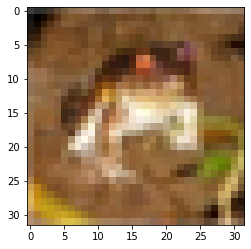

In [0]:
plt.imshow(X_train[0])

## 2. Build model step by step and investigate

In [0]:
model = Sequential()
model.add(layers.Conv2D(10, kernel_size = (5,5), input_shape=(32, 32, 3), padding='same'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 10)        760       
Total params: 760
Trainable params: 760
Non-trainable params: 0
_________________________________________________________________


In [0]:
model = Sequential()

# padding='valid' :  the output is smaller than the input
model.add(layers.Conv2D(10, kernel_size = (5,5), input_shape=(32, 32, 3), padding='valid'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 10)        760       
Total params: 760
Trainable params: 760
Non-trainable params: 0
_________________________________________________________________


In [0]:
#n_params
10 * 5*5 * 3 + 10

760

In [0]:
# If we add some strides, what the shape?
model = Sequential()
model.add(layers.Conv2D(10, kernel_size = (5,5), input_shape=(32, 32, 3), strides=(2,2), padding='valid'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 14, 14, 10)        760       
Total params: 760
Trainable params: 760
Non-trainable params: 0
_________________________________________________________________


In [0]:
def custom_padding(img):
    augmented_img = np.zeros((img.shape[0] + 2,img.shape[1] + 2,img.shape[2]))
    augmented_img[1:-1,1:-1,:] = img
    return augmented_img